# Indeed.com Job Description Word Counts for Job Apps

In [189]:
# import sys
# !conda install --yes --prefix {sys.prefix} requests
# !conda install --yes --prefix {sys.prefix} numpy
# !conda install --yes --prefix {sys.prefix} bs4
# !conda install --yes --prefix {sys.prefix} nltk
# !conda install --yes --prefix {sys.prefix} collections
# !conda install --yes --prefix {sys.prefix} string

## 1. Copy and paste the Indeed Job Posting URL here within the quotes:

In [193]:
URL = 'https://www.indeed.com/viewjob?jk=283341ab7848f08f&tk=1fjhgu1kcu3po800&from=serp&vjs=3'

## 2. Run below function:

In [199]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import collections
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
stop = stopwords.words('english')

def get_words(url, existinglist):
    
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find(id="jobDescriptionText")
    all_text = results.text
    
    all_text = all_text.replace('[^\w\s]',' ')
    all_text=all_text.lower()
    punc = '''!(')-[]{};:'"\,<>./?@#$%^&*`_~'''
    nums  = '1234567890'
 
    # Removing punctuations in string
    # Using loop + punctuation string
    for ele in all_text:
        if ele in punc or ele in nums:
            all_text = all_text.replace(ele, " ")
    
    all_text = all_text.replace("\n", " ")
    
    
    alltext = all_text.split(' ')
    
    alltext = ' '.join(alltext)

    
    textnostop = [word for word in alltext.split(' ') if word not in stop]
 
 
    for word in textnostop:
        if len(word) == 0 or word == '':
            textnostop.remove(word)
            
    for word in textnostop:
        if word not in existinglist.keys():
            existinglist[word] = 1
        else:
            existinglist[word] += 1
    nogos = ['', 'https', 'we', 'one', 'us', 'role', 'us', 'com', 'work', 'within', 'working', 'company', 
             'career', 'make', 'www',  'our', 'at']
    
    for nogo in nogos:
        if nogo in existinglist.keys():
            del existinglist[nogo]
    
    final_list = dict(sorted(existinglist.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)[:30])
    final_list_correct = sorted(final_list.items(), key = lambda kv:(kv[1], kv[0]))
    
    return dict(final_list_correct), dict(sorted(existinglist.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))

In [200]:
## Run below

In [201]:
existinglist = {}
all_words_top30, all_words = get_words(URL, existinglist)

## 3. Plot Top 30 Words and Counts:

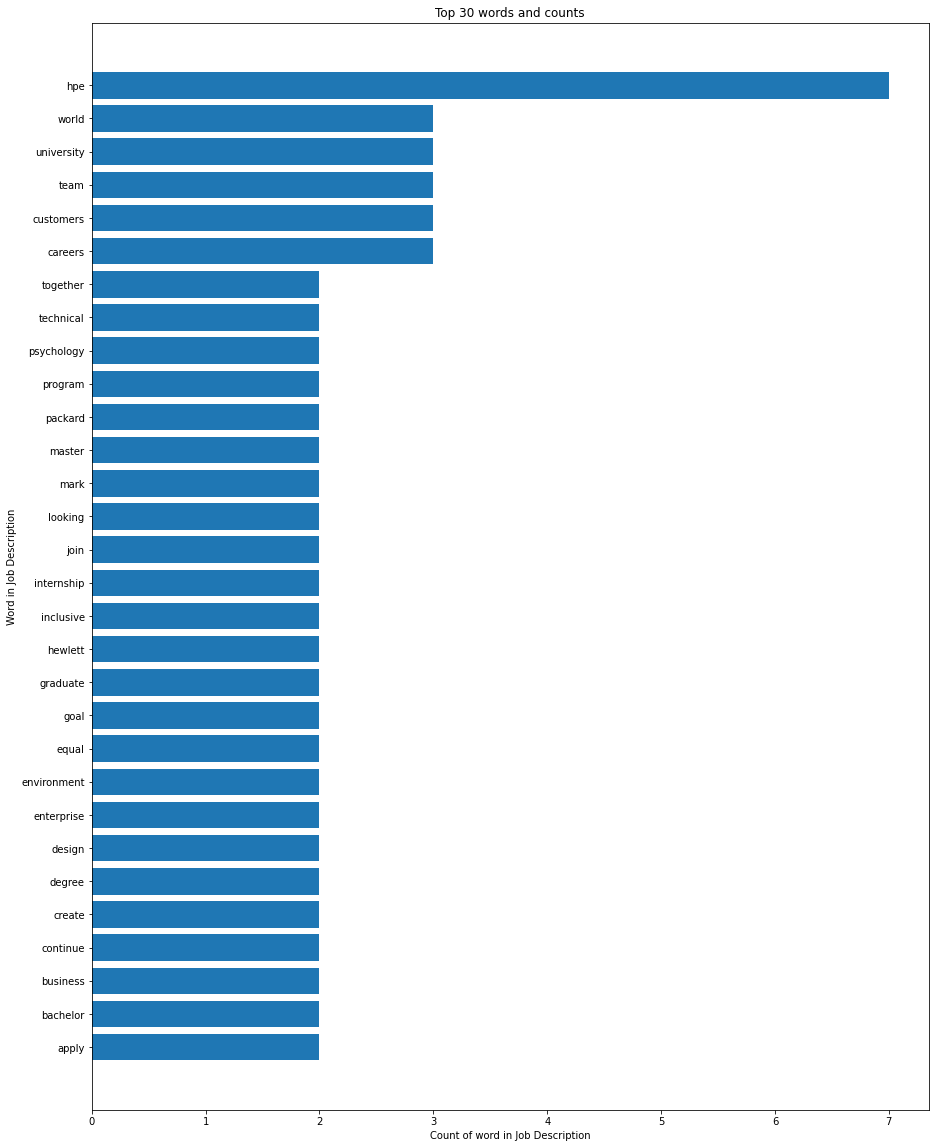

In [202]:
import numpy as np
import matplotlib.pyplot as plt
bars = all_words_top30.keys()

y_pos = np.arange(len(bars))

plt.figure(figsize=(15,20))
plt.barh(y_pos, all_words_top30.values())
plt.yticks(y_pos, bars)
plt.ylabel('Word in Job Description')
plt.xlabel('Count of word in Job Description')
plt.title('Top 30 words and counts')
plt.show()

## 4. See the full list of words used in the job description:

In [198]:
all_words

{'hpe': 7,
 'world': 3,
 'university': 3,
 'team': 3,
 'customers': 3,
 'careers': 3,
 'together': 2,
 'technical': 2,
 'psychology': 2,
 'program': 2,
 'packard': 2,
 'master': 2,
 'mark': 2,
 'looking': 2,
 'join': 2,
 'internship': 2,
 'inclusive': 2,
 'hewlett': 2,
 'graduate': 2,
 'goal': 2,
 'equal': 2,
 'environment': 2,
 'enterprise': 2,
 'design': 2,
 'degree': 2,
 'create': 2,
 'continue': 2,
 'business': 2,
 'bachelor': 2,
 'apply': 2,
 '“yes': 1,
 '‘edge’': 1,
 'you’re': 1,
 'you’ll': 1,
 'world´s': 1,
 'whether': 1,
 'way': 1,
 'want': 1,
 'visual': 1,
 'via': 1,
 'veterans': 1,
 'variety': 1,
 'values': 1,
 'undergoing': 1,
 'unconditionally': 1,
 'twitter': 1,
 'training': 1,
 'towards': 1,
 'today': 1,
 'thrives': 1,
 'technology': 1,
 'tech': 1,
 'supportive': 1,
 'summer': 1,
 'study': 1,
 'students': 1,
 'start': 1,
 'specific': 1,
 'sound': 1,
 'solutions': 1,
 'skills': 1,
 'shared': 1,
 'semesters': 1,
 'salary': 1,
 'responsibilities': 1,
 'required': 1,
 'repres